In [1]:
import tensorflow as tf

In [2]:
import numpy as np

In [3]:
import PIL.Image

In [4]:
from io import BytesIO

In [5]:
from IPython.display import Image, display

In [6]:
def DisplayFractal(a, fmt='jpeg'):
    """Display an array of iteration counts as a colorful picture of a fractal."""
    a_cyclic = (6.28 * a / 20.0).reshape(list(a.shape) + [1])
    img = np.concatenate([10 + 20 * np.cos(a_cyclic),
                         30 + 50 * np.sin(a_cyclic),
                         155 - 80 * np.cos(a_cyclic)], 2)
    img[a == a.max()] = 0
    a = img
    a = np.uint8(np.clip(a, 0, 255))
    f = BytesIO()
    PIL.Image.fromarray(a).save(f, fmt)
    display(Image(data = f.getvalue()))

In [7]:
sess = tf.InteractiveSession()

In [8]:
Y, X = np.mgrid[-1.3 : 1.3 : 0.005, -2 : 1 : 0.005]
Z = X + 1j * Y

In [9]:
xs = tf.constant(Z.astype(np.complex64))
zs = tf.Variable(xs)
ns = tf.Variable(tf.zeros_like(xs, tf.float32))

In [10]:
tf.global_variables_initializer().run()

In [11]:
zs_ = zs * zs + 0.279
not_diverged = tf.abs(zs_) < 4

step = tf.group(
    zs.assign(zs_),
    ns.assign_add(tf.cast(not_diverged, tf.float32)))

In [12]:
for i in range(200): step.run()

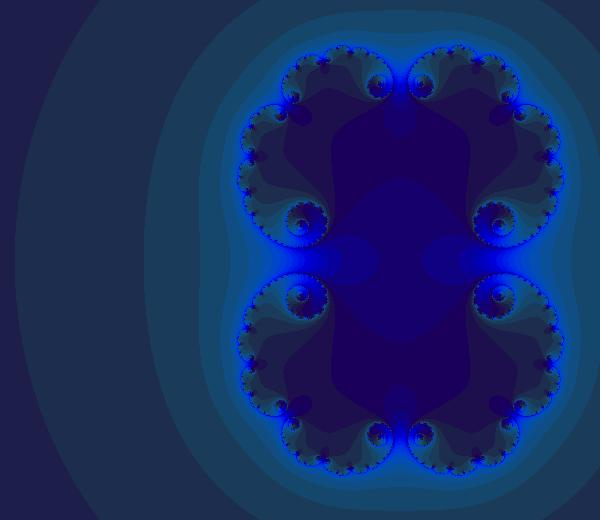

In [13]:
DisplayFractal(ns.eval())